In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
data=pd.read_excel("FIFA7.xlsx")
data.head()

,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Curve,Dribbling,Finishing,...,Volleys,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Real
0,89,63,89,63,93,95,85,81,91,94,...,88,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500,565,LS
1,92,48,90,95,95,96,77,89,97,95,...,85,L. Messi,30,Argentina,93,93,FC Barcelona,105000,565,CAM
2,94,56,96,82,95,92,75,81,96,89,...,83,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000,280,LW
3,88,78,86,60,91,83,77,86,86,94,...,88,L. SuÌÁrez,30,Uruguay,92,92,FC Barcelona,97000,510,CF
4,79,80,78,80,89,87,62,77,85,91,...,87,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000,355,LS


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15741 entries, 0 to 15740
Data columns (total 43 columns):
Acceleration          15741 non-null int64
Aggression            15741 non-null int64
Agility               15741 non-null int64
Balance               15741 non-null int64
Ball_control          15741 non-null int64
Composure             15741 non-null int64
Crossing              15741 non-null int64
Curve                 15741 non-null int64
Dribbling             15741 non-null int64
Finishing             15741 non-null int64
Free_kick_accuracy    15741 non-null int64
GK_diving             15741 non-null int64
GK_handling           15741 non-null int64
GK_kicking            15741 non-null int64
GK_positioning        15741 non-null int64
GK_reflexes           15741 non-null int64
Heading_accuracy      15741 non-null int64
Interceptions         15741 non-null int64
Jumping               15741 non-null int64
Long_passing          15741 non-null int64
Long_shots            15741 non

In [5]:
sum(data.isna().any())

0

In [6]:
#drop non-important variables
#drop wage & value as they do not affect rating, but rather are affected by it
#drop positional column as it does not directly influence the rating
data.drop(["Club","Nationality","Name","Wage","Value","Potential","Real"],axis=1,inplace=True)

In [7]:
#create other column for classification of Y variables
overall_clas=data.loc[:,"Overall"]
overall_clas.head()

0    94
1    93
2    92
3    92
4    91
Name: Overall, dtype: int64

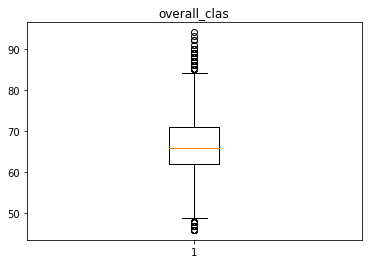

In [8]:
plt.boxplot(overall_clas)
plt.title("overall_clas")
plt.show()

In [9]:
# as there are number of outliers, we decided to use median 
median = overall_clas.median()
print(median)

66.0


In [10]:
#classify Y into 0 & 1; 1-if rating is higher than the median & 0 if lower
def classifier(x, limit):
    if x > limit:
        return 1
    else:
        return 0
      
overall_clas1 = overall_clas.apply(lambda x: classifier(x, median))
overall_clas1.head()

0    1
1    1
2    1
3    1
4    1
Name: Overall, dtype: int64

In [11]:
data.info()
#only numeric variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15741 entries, 0 to 15740
Data columns (total 36 columns):
Acceleration          15741 non-null int64
Aggression            15741 non-null int64
Agility               15741 non-null int64
Balance               15741 non-null int64
Ball_control          15741 non-null int64
Composure             15741 non-null int64
Crossing              15741 non-null int64
Curve                 15741 non-null int64
Dribbling             15741 non-null int64
Finishing             15741 non-null int64
Free_kick_accuracy    15741 non-null int64
GK_diving             15741 non-null int64
GK_handling           15741 non-null int64
GK_kicking            15741 non-null int64
GK_positioning        15741 non-null int64
GK_reflexes           15741 non-null int64
Heading_accuracy      15741 non-null int64
Interceptions         15741 non-null int64
Jumping               15741 non-null int64
Long_passing          15741 non-null int64
Long_shots            15741 non

In [12]:
#create new dataset for droping highly correlated variables
data_num=data.copy()
data_num.head()

,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Curve,Dribbling,Finishing,...,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,Age,Overall
0,89,63,89,63,93,95,85,81,91,94,...,94,23,91,92,31,80,85,88,32,94
1,92,48,90,95,95,96,77,89,97,95,...,85,26,87,73,28,59,90,85,30,93
2,94,56,96,82,95,92,75,81,96,89,...,80,33,90,78,24,53,80,83,25,92
3,88,78,86,60,91,83,77,86,86,94,...,87,38,77,89,45,80,84,88,30,92
4,79,80,78,80,89,87,62,77,85,91,...,88,19,83,79,42,84,78,87,28,91


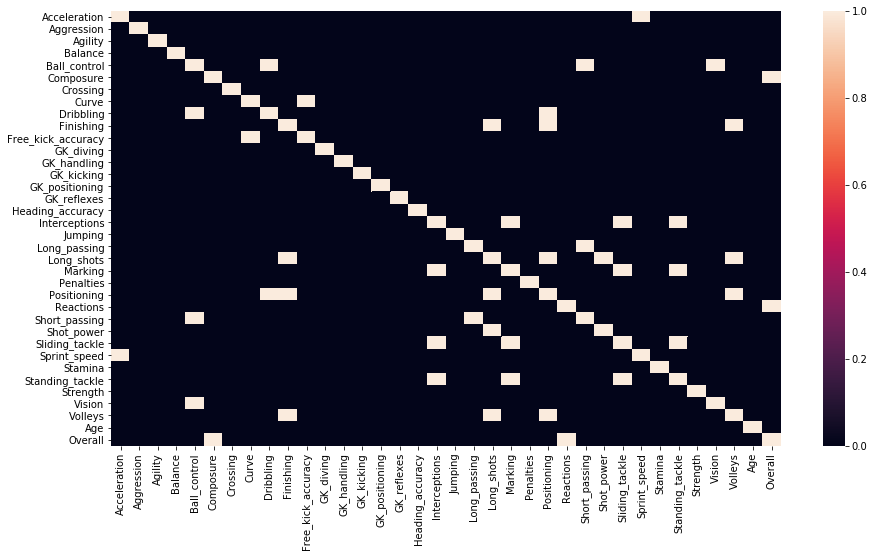

In [13]:
#check for multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr().abs().round(2)>=0.75)

In [14]:
data_num.drop(["Long_shots","Marking","Sliding_tackle","Long_passing"],axis=1,inplace=True)

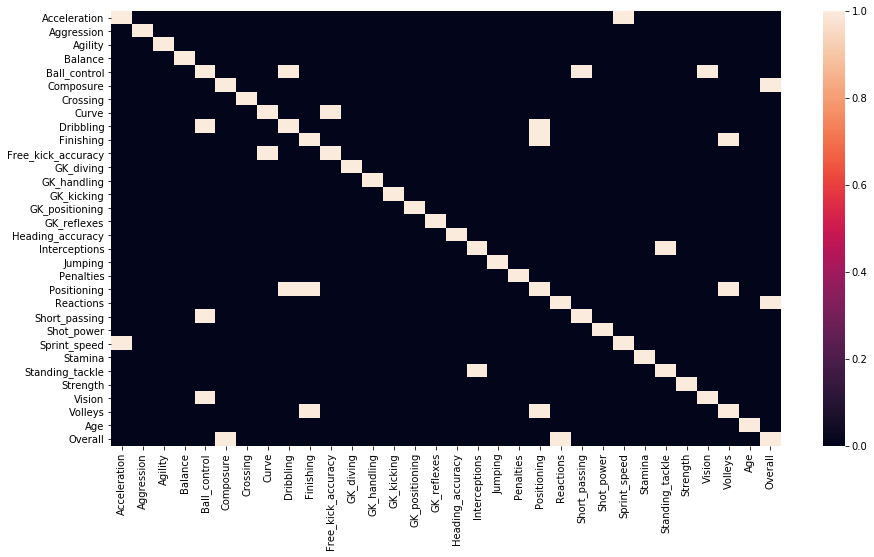

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr().abs().round(2)>=0.75)

In [16]:
data_num.drop(["Ball_control","Positioning","Volleys"],axis=1,inplace=True)

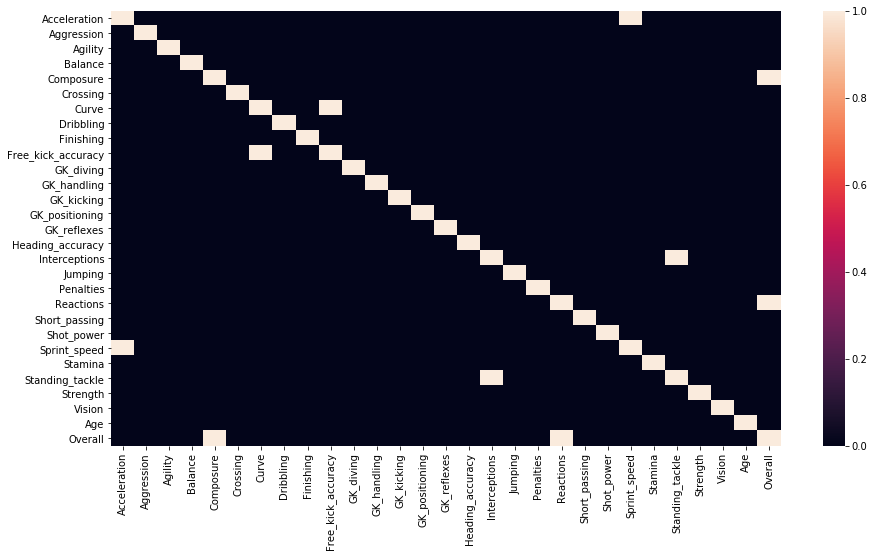

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr().abs().round(2)>=0.75)

In [18]:
data_num.drop(["Curve","Interceptions","Standing_tackle","Free_kick_accuracy"], axis=1,inplace=True)

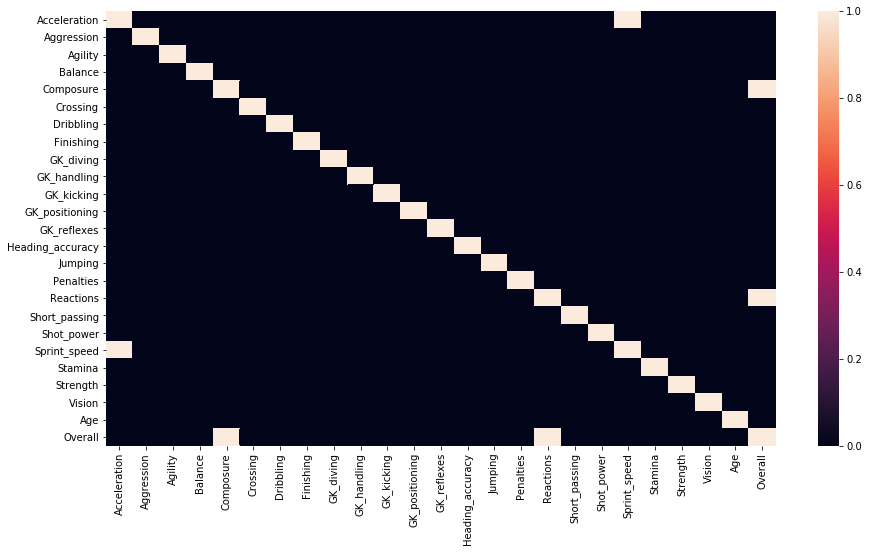

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr().abs().round(2)>=0.75)

In [20]:
data_num.drop(["Sprint_speed","Composure","Reactions"], axis=1,inplace=True)

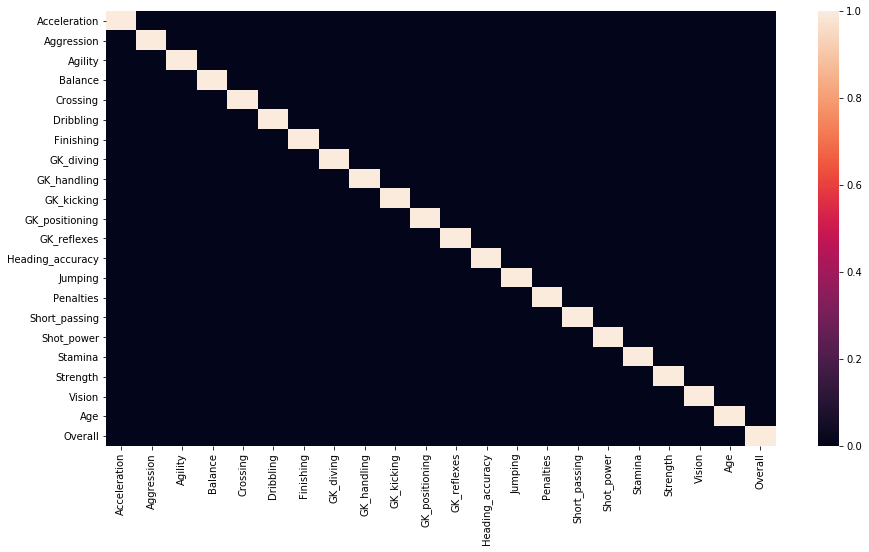

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr().abs().round(2)>=0.75)

In [22]:
# dropped 14 variables for solving multicollinearity problem

In [23]:
# data_clean is free from multicollinearity for model analyzes, except PLS
data_clean = data_num

In [24]:
data_clean.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Crossing',
       'Dribbling', 'Finishing', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'Heading_accuracy', 'Jumping',
       'Penalties', 'Short_passing', 'Shot_power', 'Stamina', 'Strength',
       'Vision', 'Age', 'Overall'],
      dtype='object')

In [25]:
Y=data_clean.Overall
X=scale(data_clean.drop(columns="Overall"))
X=pd.DataFrame(X)
X.columns=['Acceleration', 'Aggression', 'Agility', 'Balance', 'Crossing',
       'Dribbling', 'Finishing', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'Heading_accuracy', 'Jumping',
       'Penalties', 'Short_passing', 'Shot_power', 'Stamina', 'Strength',
       'Vision', 'Age']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [26]:
X.head()

,Acceleration,Aggression,Agility,Balance,Crossing,Dribbling,Finishing,GK_diving,GK_handling,GK_kicking,...,GK_reflexes,Heading_accuracy,Jumping,Penalties,Short_passing,Shot_power,Stamina,Strength,Vision,Age
0,1.777536,0.237013,1.819261,-0.280427,2.157787,2.406053,2.707366,-1.134021,0.123694,1.355807,...,0.130840,2.653676,2.499661,2.572488,2.043788,2.561898,2.180542,1.116149,2.283902,1.564276
1,2.030004,-0.785932,1.899263,2.340639,1.595761,2.876630,2.768226,-1.453427,0.123694,1.355807,...,-0.823685,1.192632,0.189159,1.698980,2.537843,1.885685,0.495837,-0.540685,2.666969,1.117907
2,2.198316,-0.240362,2.379272,1.275831,1.455255,2.798201,2.403062,-0.495210,-0.518797,1.355807,...,0.130840,0.419138,-0.409860,2.254848,1.846166,1.510012,0.939181,-1.014065,1.900835,0.001985
3,1.693380,1.259958,1.579256,-0.526152,1.595761,2.013904,2.707366,5.254093,4.621128,6.338196,...,8.403390,1.708295,0.274733,2.572488,2.043788,2.035955,1.914536,1.116149,2.207289,1.117907
4,0.935976,1.396351,0.939243,1.112014,0.541964,1.935475,2.524784,1.421225,-1.482532,0.421609,...,-0.187335,2.395845,1.558346,2.254848,2.043788,2.111089,1.027849,1.431736,1.747609,0.671538


# PLS Regression

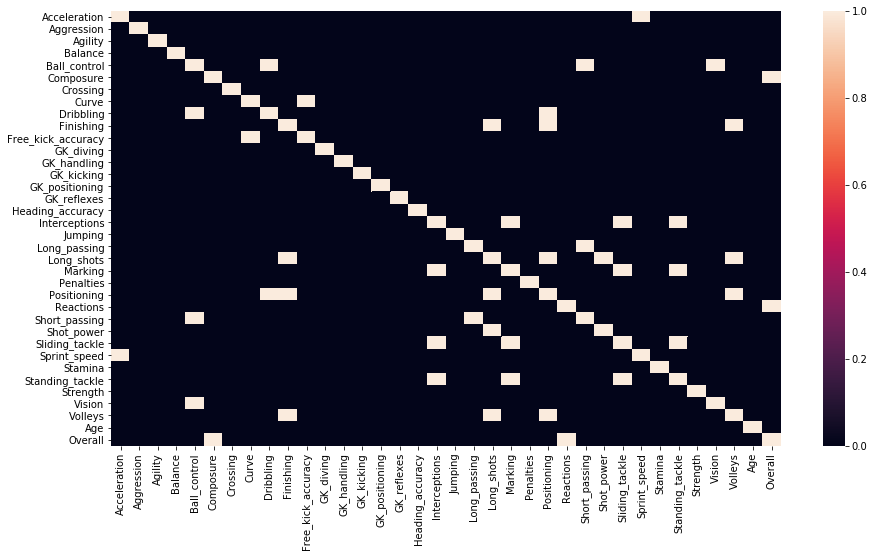

In [27]:
# full data set with multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(data.corr().abs().round(2)>=0.75)

In [28]:
Y1=data.Overall
X1=data.drop(columns="Overall")
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,Y1,test_size=0.25,random_state=42)

In [29]:
scaler=StandardScaler()
scaler.fit(x1_train)

x1_train=pd.DataFrame(scaler.transform(x1_train),columns=x1_train.columns.tolist())
x1_test=pd.DataFrame(scaler.transform(x1_test),columns=x1_test.columns.tolist())

In [30]:
# 5-fold CV, with shuffle for finding optimal number of latent variables
n = len(x1_train)
kf_5 = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
mse = []
#X has 47 variables
for i in np.arange(1, 21):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, x1_train, y1_train, cv=kf_5, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

(-1, 20.95)

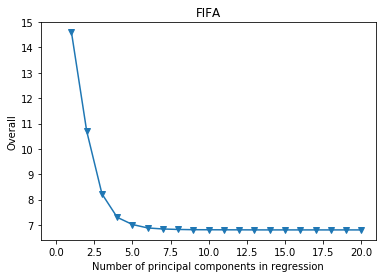

In [31]:
# Plot results
plt.plot(np.arange(1, 21), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Overall')
plt.title('FIFA')
plt.xlim(xmin=-1)

In [32]:
# as after 8 components MSE is almost the same we choose it as number of latent variables
pls = PLSRegression(n_components=7)
pls.fit(scale(x1_train), y1_train)
print("MSE:",mean_squared_error(y1_test, pls.predict(scale(x1_test))))

MSE: 6.629832954718345


In [33]:
pred=pls.predict(x1_test)

#R-square
pls_r2=pls.score(x1_test,y1_test)
print("R-square:",pls_r2)

#coefficients
coef=pd.DataFrame(pls.coef_)

#scores of latent variables
sc=pd.DataFrame(pls.x_scores_)


R-square: 0.8592721732997934


In [34]:
var_xcores=np.var(pls.x_scores_,axis=0)
total_var=np.sum(np.var(x1_train,axis=0))
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3) #calculates cummulative variance
print(X_Variance)

   Latent_Factors  X_Variance  Cummulative_X_Variance
0               0       0.271                   0.271
1               1       0.179                   0.450
2               2       0.043                   0.493
3               3       0.038                   0.531
4               4       0.043                   0.574
5               5       0.014                   0.588
6               6       0.021                   0.609


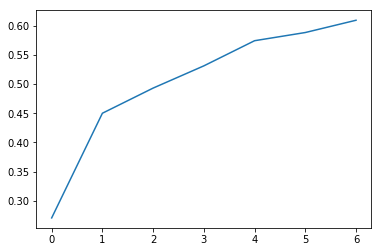

In [35]:
#see visually from which latent variable the variance changes very slightly
plt.plot(X_Variance.Latent_Factors,X_Variance.Cummulative_X_Variance)
plt.show()


# Linear Regression

In [36]:
#linear regression and R-square
lin_reg=LinearRegression().fit(X,Y)
pr_2=lin_reg.predict(x_test)
Linear_r2=r2_score(y_test,pr_2)
print(Linear_r2)

0.7470155064654739


In [37]:
#comparison of R-Square of pls and linear regression
print(pls_r2,Linear_r2)

0.8592721732997934 0.7470155064654739


# Decision Tree

In [38]:
Y3=overall_clas1
X3=data_clean.drop(columns="Overall")

In [39]:
#create new tran & test sets based on classified Y
x2_train,x2_test,y2_train,y2_test=train_test_split(X3,Y3,test_size=0.25,random_state=42)

In [40]:
tree1=DecisionTreeClassifier(class_weight="balanced",random_state=42)
grid_search=GridSearchCV(tree1,param_grid={"max_depth":range(5,35),"min_samples_leaf":range(10,200,10)},scoring="roc_auc",cv=5,n_jobs=-1)
grid_search.fit(X3,Y3)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(5, 35), 'min_samples_leaf': range(10, 200, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [41]:
#best parameters and best score
print("Best parameters:",grid_search.best_params_)
print("Best score:",grid_search.best_score_.round(2))

Best parameters: {'max_depth': 11, 'min_samples_leaf': 120}
Best score: 0.97


In [42]:
tree1=DecisionTreeClassifier(max_depth=11,min_samples_leaf=120,class_weight="balanced",random_state=42)
tree1.fit(x2_train,y2_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=11, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=120, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [43]:
ypred2=tree1.predict(x2_test)
recall_DT1=recall_score(y2_test,ypred2)
print("Accuracy Test:",tree1.score(x2_test,y2_test).round(2)*100)
print("DT Recall Test:",recall_DT1.round(2)*100)
roc_auc1=roc_auc_score(y2_test,ypred2).round(2)*100
print("ROC_AUC Test:",roc_auc1)
print("classification_report test:",classification_report(y2_test,ypred2))
ypred_tr1=tree1.predict(x2_train)
recall_DT2=recall_score(y2_train,ypred_tr1)
print("Accuracy Train:",tree1.score(x2_train,y2_train).round(2)*100)
print("DT Recall Train:",recall_DT2.round(2)*100)
roc_auc_tr1=roc_auc_score(y2_train,ypred_tr1).round(2)*100
print("ROC_AUC Train:",roc_auc_tr1)
print("classification_report Train:",classification_report(y2_train,ypred_tr1))

Accuracy Test: 87.0
DT Recall Test: 87.0
ROC_AUC Test: 87.0
classification_report test:              precision    recall  f1-score   support

          0       0.87      0.86      0.87      1941
          1       0.87      0.87      0.87      1995

avg / total       0.87      0.87      0.87      3936

Accuracy Train: 87.0
DT Recall Train: 88.0
ROC_AUC Train: 87.0
classification_report Train:              precision    recall  f1-score   support

          0       0.88      0.87      0.87      5972
          1       0.87      0.88      0.87      5833

avg / total       0.87      0.87      0.87     11805



In [45]:
print(pd.DataFrame(tree1.predict_proba(x2_test)[:6,:]))

          0         1
0  0.999103  0.000897
1  0.084769  0.915231
2  0.999103  0.000897
3  0.000000  1.000000
4  0.983222  0.016778
5  0.203231  0.796769


In [46]:
#ROC curve
FPR,TPR,tresholds=roc_curve(y2_test,tree1.predict_proba(x2_test)[:,1])
print(FPR,TPR)

[0.         0.00257599 0.00309119 0.00309119 0.00360639 0.00515198
 0.00618238 0.00978877 0.01236476 0.01391036 0.01597115 0.01700155
 0.01957754 0.02575992 0.03451829 0.04224626 0.04739825 0.05564142
 0.0638846  0.07109737 0.08294693 0.08912931 0.09788769 0.10149408
 0.11282844 0.12004122 0.13652756 0.1571355  0.16950026 0.18495621
 0.20453375 0.22359608 0.24317362 0.26069037 0.28284389 0.30087584
 0.31839258 0.33848532 0.35651726 0.37712519 0.39567233 0.41009789
 0.43173622 0.45801133 0.47552808 0.49459042 0.52653272 0.55692942
 0.58629572 0.60278207 0.63369397 1.        ] [0.         0.32030075 0.34586466 0.36240602 0.39899749 0.4235589
 0.44711779 0.4716792  0.49373434 0.51528822 0.53233083 0.5518797
 0.57493734 0.5924812  0.61102757 0.64210526 0.67769424 0.69724311
 0.71829574 0.73934837 0.76090226 0.77593985 0.80701754 0.82756892
 0.84761905 0.86516291 0.87468672 0.89373434 0.90877193 0.91629073
 0.92130326 0.93132832 0.93934837 0.94736842 0.95739348 0.96190476
 0.96340852 0.9744

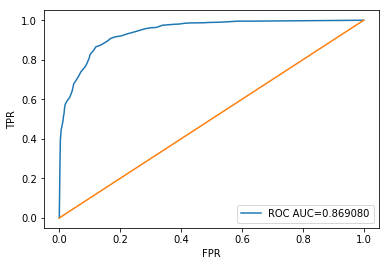

In [49]:
#Plotting ROC curve
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y2_test,ypred2))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [50]:
imp=tree1.feature_importances_
imp=pd.DataFrame(data=imp, index=X.columns, columns=['importances'])
imp=imp.sort_values(by="importances", ascending=False)
imp.head()

,importances
Short_passing,0.477831
Heading_accuracy,0.236418
Dribbling,0.085541
Crossing,0.071616
Stamina,0.043994


# Random Forest

In [46]:
RF=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=11,n_estimators=300)
RF.fit(x2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [77]:
ypred3=RF.predict(x2_test)
recall_RF=recall_score(y2_test,ypred3)
print("Accuracy Test:",RF.score(x2_test,y2_test).round(2)*100)
print("Recall Test:",recall_RF.round(2)*100)
roc_auc3=roc_auc_score(y2_test,ypred3).round(2)*100
print("ROC_AUC Test:",roc_auc3)
print("Classification report Test:",classification_report(y2_test,ypred3))
ypred_tr3=RF.predict(x2_train)
recall_RF3=recall_score(y2_train,ypred_tr3)
print("Accuracy Train:",RF.score(x2_train,y2_train).round(2)*100)
print("Recall Train:",recall_RF3.round(2)*100)
roc_auc_tr2=roc_auc_score(y2_train,ypred_tr3).round(2)*100
print("ROC_AUC Train:",roc_auc_tr2)
print("classification_report Train:",classification_report(y2_train,ypred_tr3))

Accuracy Test: 91.0
Recall Test: 91.0
ROC_AUC Test: 91.0
Classification report Test:              precision    recall  f1-score   support

          0       0.91      0.91      0.91      1941
          1       0.91      0.91      0.91      1995

avg / total       0.91      0.91      0.91      3936

Accuracy Train: 98.0
Recall Train: 96.0
ROC_AUC Train: 98.0
classification_report Train:              precision    recall  f1-score   support

          0       0.97      0.99      0.98      5972
          1       0.99      0.96      0.98      5833

avg / total       0.98      0.98      0.98     11805



# Logit  from statsmodel

In [48]:
formula='overall_clas1~'+'+'.join(X.columns.tolist())
formula

'overall_clas1~Acceleration+Aggression+Agility+Balance+Crossing+Dribbling+Finishing+GK_diving+GK_handling+GK_kicking+GK_positioning+GK_reflexes+Heading_accuracy+Jumping+Penalties+Short_passing+Shot_power+Stamina+Strength+Vision+Age'

In [49]:
Y3=pd.DataFrame(Y3)
data_final=Y3.join(X3)
data_final.head()

,Overall,Acceleration,Aggression,Agility,Balance,Crossing,Dribbling,Finishing,GK_diving,GK_handling,...,GK_reflexes,Heading_accuracy,Jumping,Penalties,Short_passing,Shot_power,Stamina,Strength,Vision,Age
0,1,89,63,89,63,85,91,94,7,11,...,11,88,95,85,83,94,92,80,85,32
1,1,92,48,90,95,77,97,95,6,11,...,8,71,68,74,88,85,73,59,90,30
2,1,94,56,96,82,75,96,89,9,9,...,11,62,61,81,81,80,78,53,80,25
3,1,88,78,86,60,77,86,94,27,25,...,37,77,69,85,83,87,89,80,84,30
4,1,79,80,78,80,62,85,91,15,6,...,10,85,84,81,83,88,79,84,78,28


In [50]:
logit1=Logit.from_formula(formula=formula,data=data_final).fit()
logit1.summary()

Optimization terminated successfully.
         Current function value: 0.356868
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          overall_clas1   No. Observations:                15741
Model:                          Logit   Df Residuals:                    15719
Method:                           MLE   Df Model:                           21
Date:                Tue, 11 Dec 2018   Pseudo R-squ.:                  0.4851
Time:                        00:07:34   Log-Likelihood:                -5617.5
converged:                       True   LL-Null:                       -10911.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -27.9846      0.533    -52.480      0.000     -29.030     -26.939
Acceleration         0.0367      0.003     11.132      0.000       0.030       0.043
Aggression           0.0200      0.002      8.829      0.000       0.016       0.024
Agility              0.0106      0.004      2.958      0.003       0.004       0.018
Balance             -0.0099      0.003     -2.936      0.003      -0.016      -0.003
Crossing             0.0094      0.003      3.485      0.000       0.004       0.015
Dribbling            0.0392      0.004      9.397      0.000       0.031       0.047
Finishing           -0.0059      0.003     -2.088      0.037      -0.012      -0.000
GK_diving           -0.0031      0.008     -0.398      0.690      -0.018       0.012
GK_handling         -0.0083      0.008     -1.075      0.283      -0.023       0.007
GK_kicking           0.0055      0.008      0.730      0.465      -0.009       0.020
GK_positioning      -0.0011      0.008     -0.142      0.887      -0.016       0.014
GK_reflexes        -1.2e-05      0.008     -0.002      0.999      -0.015       0.015
Heading_accuracy     0.0832      0.003     26.076      0.000       0.077       0.089
Jumping              0.0062      0.002      2.579      0.010       0.001       0.011
Penalties            0.0072      0.003      2.444      0.015       0.001       0.013
Short_passing        0.1613      0.005     31.830      0.000       0.151       0.171
Shot_power           0.0242      0.003      8.455      0.000       0.019       0.030
Stamina              0.0090      0.003      3.435      0.001       0.004       0.014
Strength             0.0282      0.003      8.989      0.000       0.022       0.034
Vision              -0.0133      0.003     -3.921      0.000      -0.020      -0.007
Age                  0.1113      0.007     16.702      0.000       0.098       0.124
====================================================================================
"""

In [51]:
logit1.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:          overall_clas1
Method:                          dydx
At:                           overall
====================================================================================
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Acceleration         0.0042      0.000     11.301      0.000       0.003       0.005
Aggression           0.0023      0.000      8.917      0.000       0.002       0.003
Agility              0.0012      0.000      2.961      0.003       0.000       0.002
Balance             -0.0011      0.000     -2.940      0.003      -0.002      -0.000
Crossing             0.0011      0.000      3.490      0.000       0.000       0.002
Dribbling            0.0045      0.000      9.501      0.000       0.004       0.005
Finishing           -0.0007      0.000     -2.089      0.037      -0.001   -4.16e-05
GK_diving           -0.0003      0.001     -0.398      0.690      -0.002       0.001
GK_handling         -0.0009      0.001     -1.075      0.283      -0.003       0.001
GK_kicking           0.0006      0.001      0.730      0.465      -0.001       0.002
GK_positioning      -0.0001      0.001     -0.142      0.887      -0.002       0.002
GK_reflexes      -1.364e-06      0.001     -0.002      0.999      -0.002       0.002
Heading_accuracy     0.0095      0.000     28.537      0.000       0.009       0.010
Jumping              0.0007      0.000      2.581      0.010       0.000       0.001
Penalties            0.0008      0.000      2.446      0.014       0.000       0.001
Short_passing        0.0183      0.001     36.432      0.000       0.017       0.019
Shot_power           0.0028      0.000      8.527      0.000       0.002       0.003
Stamina              0.0010      0.000      3.440      0.001       0.000       0.002
Strength             0.0032      0.000      9.072      0.000       0.003       0.004
Vision              -0.0015      0.000     -3.928      0.000      -0.002      -0.001
Age                  0.0126      0.001     17.317      0.000       0.011       0.014
====================================================================================
"""

In [52]:
#important features
model = sm.OLS(Y3,X3)
results = model.fit()

In [53]:
pvals = results.pvalues
#coeff = results.params
#results_df = pd.DataFrame({"pvals":pvals, "coeff":coeff,})
#results_df = results_df[["coeff","pvals"]]
results_df = pd.DataFrame({"pvals":pvals})
results_df = results_df[["pvals"]]
results_df.head()

,pvals
Acceleration,7.265572e-08
Aggression,1.699977e-49
Agility,8.374557e-01
Balance,5.457972e-170
Crossing,5.958056e-46


In [54]:
results_1=results_df[results_df.pvals<0.05]
results_1.head()

,pvals
Acceleration,7.265572e-08
Aggression,1.699977e-49
Balance,5.457972e-170
Crossing,5.958056e-46
Dribbling,9.341551e-15


In [55]:
imp_list=(results_1.index.values.tolist())
print(imp_list)

['Acceleration', 'Aggression', 'Balance', 'Crossing', 'Dribbling', 'Finishing', 'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes', 'Heading_accuracy', 'Penalties', 'Short_passing', 'Shot_power', 'Stamina', 'Strength', 'Age']


In [52]:
data_final_imp=X.join(overall_clas1)
data_final_imp.head()

,Acceleration,Aggression,Agility,Balance,Crossing,Dribbling,Finishing,GK_diving,GK_handling,GK_kicking,...,Heading_accuracy,Jumping,Penalties,Short_passing,Shot_power,Stamina,Strength,Vision,Age,Overall
0,1.777536,0.237013,1.819261,-0.280427,2.157787,2.406053,2.707366,-1.134021,0.123694,1.355807,...,2.653676,2.499661,2.572488,2.043788,2.561898,2.180542,1.116149,2.283902,1.564276,1
1,2.030004,-0.785932,1.899263,2.340639,1.595761,2.876630,2.768226,-1.453427,0.123694,1.355807,...,1.192632,0.189159,1.698980,2.537843,1.885685,0.495837,-0.540685,2.666969,1.117907,1
2,2.198316,-0.240362,2.379272,1.275831,1.455255,2.798201,2.403062,-0.495210,-0.518797,1.355807,...,0.419138,-0.409860,2.254848,1.846166,1.510012,0.939181,-1.014065,1.900835,0.001985,1
3,1.693380,1.259958,1.579256,-0.526152,1.595761,2.013904,2.707366,5.254093,4.621128,6.338196,...,1.708295,0.274733,2.572488,2.043788,2.035955,1.914536,1.116149,2.207289,1.117907,1
4,0.935976,1.396351,0.939243,1.112014,0.541964,1.935475,2.524784,1.421225,-1.482532,0.421609,...,2.395845,1.558346,2.254848,2.043788,2.111089,1.027849,1.431736,1.747609,0.671538,1


In [53]:
formula="overall_clas1~"+"+".join(X.columns)
logit_new_imp=Logit.from_formula(formula=formula,data=data_final_imp).fit()
marg_eff=pd.read_html(logit_new_imp.get_margeff().summary().tables[1].as_html(),header=0)[0]
sig_marg_eff=marg_eff[marg_eff["P>|z|"]<0.05]

Optimization terminated successfully.
         Current function value: 0.356868
         Iterations 7


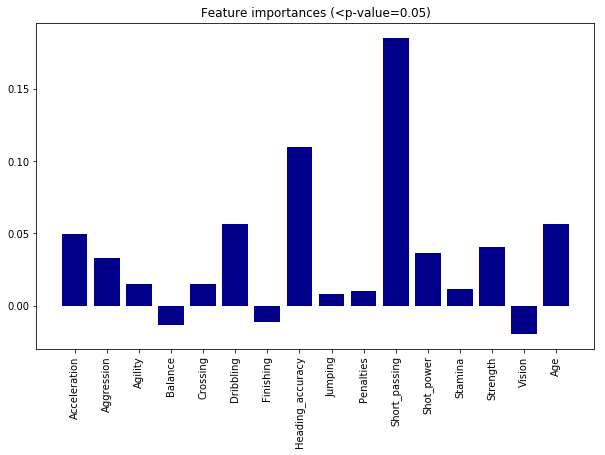

In [59]:
plt.figure(figsize=(10,6))
plt.bar(sig_marg_eff["Unnamed: 0"],sig_marg_eff["dy/dx"],color="darkblue")
plt.xticks(rotation=90)
plt.title("Feature importances (<p-value=0.05)")
plt.show()

## Logistic Regression with not  scaled data from sklearn

In [56]:
grid_search4=GridSearchCV(LogisticRegression(random_state=42),
                         param_grid={"C":np.linspace(0.0001,50,10),"class_weight":[None,"balanced"]},
                         scoring="roc_auc",cv=5,n_jobs=-1)
grid_search4.fit(X3,Y3)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 5.55564e+00, 1.11112e+01, 1.66667e+01, 2.22223e+01,
       2.77778e+01, 3.33334e+01, 3.88889e+01, 4.44445e+01, 5.00000e+01]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [57]:
print(grid_search4.best_params_)
best=list(grid_search4.best_params_.values())[0]
print("Best score:", grid_search4.best_score_.round(2)*100)

{'C': 50.0, 'class_weight': 'balanced'}
Best score: 96.0


In [58]:
logit2=LogisticRegression(C=best,random_state=42,class_weight="balanced")
logit2.fit(x2_train,y2_train)

LogisticRegression(C=50.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [76]:
print("Accuracy Test:",logit2.score(x2_test,y2_test).round(2)*100)
ypred4=logit2.predict(x2_test)
print("Recall Test:",recall_score(y2_test,ypred4).round(2)*100)
roc_auc4=roc_auc_score(y2_test,ypred4).round(2)*100
print("ROC_AUC Test:",roc_auc4)
print("Classification report Test:",classification_report(y2_test,ypred4))
ypred_tr4=logit2.predict(x2_train)
recall_l4=recall_score(y2_train,ypred_tr4)
print("Accuracy Train:",logit2.score(x2_train,y2_train).round(2)*100)
print("Recall Train:",recall_l4.round(2)*100)
roc_auc_tr4=roc_auc_score(y2_train,ypred_tr4).round(2)*100
print("ROC_AUC Train:",roc_auc_tr4)
print("classification_report Train:",classification_report(y2_train,ypred_tr4))

Accuracy Test: 84.0
Recall Test: 84.0
ROC_AUC Test: 84.0
Classification report Test:              precision    recall  f1-score   support

          0       0.84      0.83      0.83      1941
          1       0.84      0.84      0.84      1995

avg / total       0.84      0.84      0.84      3936

Accuracy Train: 84.0
Recall Train: 84.0
ROC_AUC Train: 84.0
classification_report Train:              precision    recall  f1-score   support

          0       0.84      0.83      0.84      5972
          1       0.83      0.84      0.84      5833

avg / total       0.84      0.84      0.84     11805



# Logistic regression with Scaled data

In [60]:
X_scaled=scale(X3)
x3_train, x3_test, y3_train, y3_test = train_test_split(X_scaled,Y3,test_size=0.25,random_state=42)

In [61]:
grid_search5=GridSearchCV(LogisticRegression(random_state=42),
                         param_grid={"C":np.linspace(0.0001,50,10),"class_weight":[None,"balanced"]},
                         scoring="roc_auc",cv=5,n_jobs=-1)
grid_search5.fit(X_scaled,Y3)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 5.55564e+00, 1.11112e+01, 1.66667e+01, 2.22223e+01,
       2.77778e+01, 3.33334e+01, 3.88889e+01, 4.44445e+01, 5.00000e+01]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [62]:
print(grid_search5.best_params_)
best=list(grid_search5.best_params_.values())[0]
print("Best score:", grid_search5.best_score_.round(2)*100)

{'C': 11.111188888888888, 'class_weight': None}
Best score: 96.0


In [63]:
logit3=LogisticRegression(C=best,random_state=42,class_weight="balanced")
logit3.fit(x3_train,y3_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=11.111188888888888, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [75]:
print("Accuracy Test:",logit3.score(x3_test,y3_test).round(2)*100)
ypred7=logit3.predict(x3_test)
print("Recall Test:",recall_score(y3_test,ypred7).round(2)*100)
roc_auc5=roc_auc_score(y3_test,ypred7).round(2)*100
print("ROC_AUC Test:",roc_auc5)
print("Classification report Test:",classification_report(y3_test,ypred7))
ypred_tr7=logit3.predict(x3_train)
recall_l7=recall_score(y3_train,ypred_tr7)
print("Accuracy Train:",logit3.score(x3_train,y3_train).round(2)*100)
print("Recall Train:",recall_l7.round(2)*100)
roc_auc_tr7=roc_auc_score(y3_train,ypred_tr7).round(2)*100
print("ROC_AUC Train:",roc_auc_tr7)
print("classification_report Train:",classification_report(y3_train,ypred_tr7))

Accuracy Test: 84.0
Recall Test: 84.0
ROC_AUC Test: 84.0
Classification report Test:              precision    recall  f1-score   support

          0       0.84      0.83      0.83      1941
          1       0.84      0.84      0.84      1995

avg / total       0.84      0.84      0.84      3936

Accuracy Train: 84.0
Recall Train: 84.0
ROC_AUC Train: 84.0
classification_report Train:              precision    recall  f1-score   support

          0       0.84      0.83      0.84      5972
          1       0.83      0.84      0.84      5833

avg / total       0.84      0.84      0.84     11805



# Gradient Boosting

GB=GradientBoostingClassifier(random_state=42)
GB.fit(x2_train,y2_train)

In [74]:
ypred5=GB.predict(x2_test)
recall_GB=recall_score(y2_test,ypred5)
print("Accuracy Test:",GB.score(x2_test,y2_test).round(2)*100)
print("Recall Test:",recall_GB.round(2)*100)
roc_auc5=roc_auc_score(y2_test,ypred5).round(2)*100
print("ROC_AUC Test:",roc_auc5)
print("Classification report Test:",classification_report(y2_test,ypred5))
ypred_tr5=GB.predict(x2_train)
recall_tGB=recall_score(y2_train,ypred_tr5)
print("Accuracy Train:",GB.score(x2_train,y2_train).round(2)*100)
print("Recall Train:",recall_tGB.round(2)*100)
roc_auc_tr5=roc_auc_score(y2_train,ypred_tr5).round(2)*100
print("ROC_AUC Train:",roc_auc_tr5)
print("classification_report Train:",classification_report(y2_train,ypred_tr5))

Accuracy Test: 91.0
Recall Test: 91.0
ROC_AUC Test: 91.0
Classification report Test:              precision    recall  f1-score   support

          0       0.91      0.92      0.91      1941
          1       0.92      0.91      0.91      1995

avg / total       0.91      0.91      0.91      3936

Accuracy Train: 92.0
Recall Train: 92.0
ROC_AUC Train: 92.0
classification_report Train:              precision    recall  f1-score   support

          0       0.92      0.93      0.92      5972
          1       0.92      0.92      0.92      5833

avg / total       0.92      0.92      0.92     11805

